In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) Cortical types map

In [2]:
ctypes = surfaces.CorticalTypes(exc_regions=None, downsampled=False)

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/brainspace/plotting/surface_plotting.py:437: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(


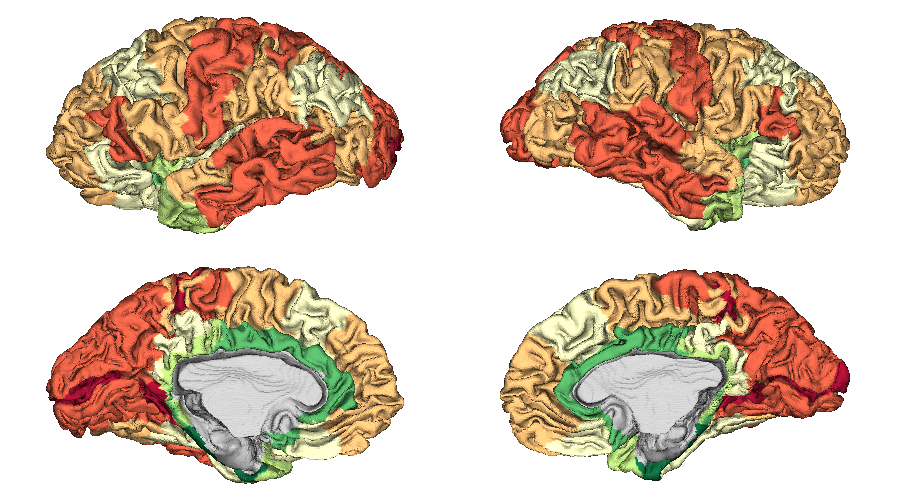

In [3]:
ctypes.plot(layout_style='grid')

## b) Mean LTC based on cortical type similarity

In [4]:
ctypes = surfaces.CorticalTypes(exc_regions='adysgranular', downsampled=False, parcellation_name='schaefer1000')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating p-value with permutation testing (1000 permutations)
Perm 0
Perm 100
Perm 200
Perm 300
Perm 400
Perm 500
Perm 600
Perm 700
Perm 800
Perm 900


,intra,inter,pvals
EU1,0.090872,-0.000837,0.099
EU2,0.181595,-0.027643,0.061
EU3,0.062151,-0.001886,0.177
KO,0.520882,-0.082461,0.001
All,0.126436,-0.003472,0.080


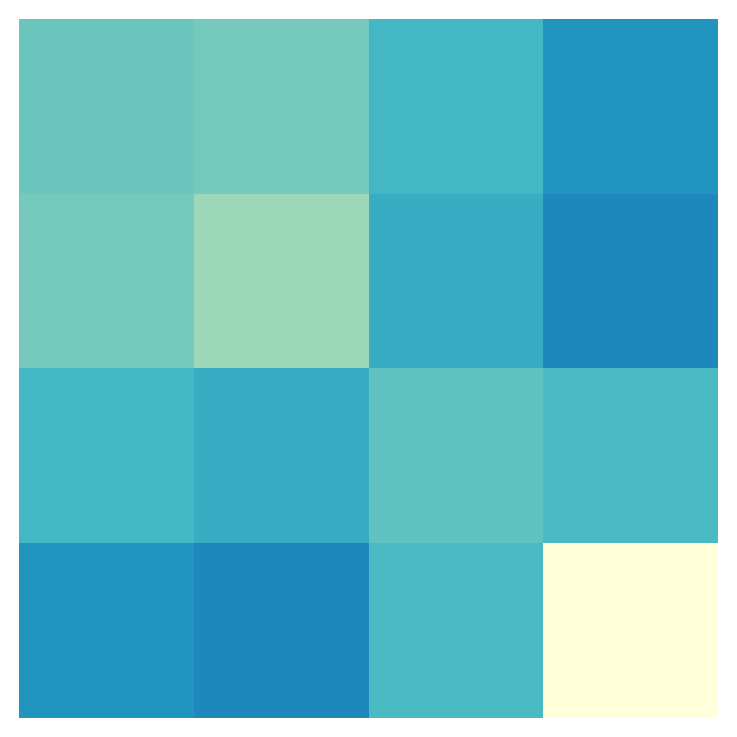

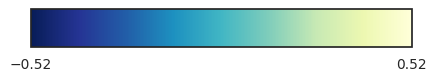

In [5]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer1000')
ltc.associate_categorical_surface(ctypes, stats=True)

## c) Cortical types in association to LTC G1

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer1000_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/code/figures/../surfaces.py:1714: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p_vals = (np.abs(null_dist) > np.abs(test_stats[:, np.newaxis])).mean(axis=1)


(F          6.413276
 EU1-EU2    0.901928
 EU1-EU3   -2.161718
 EU1-KO    -1.487174
 EU2-EU3   -4.109566
 EU2-KO    -2.418448
 EU3-KO    -0.087791
 dtype: float64,
 F          0.633
 EU1-EU2    0.815
 EU1-EU3    0.409
 EU1-KO     0.500
 EU2-EU3    0.482
 EU2-KO     0.588
 EU3-KO     0.963
 dtype: float64)

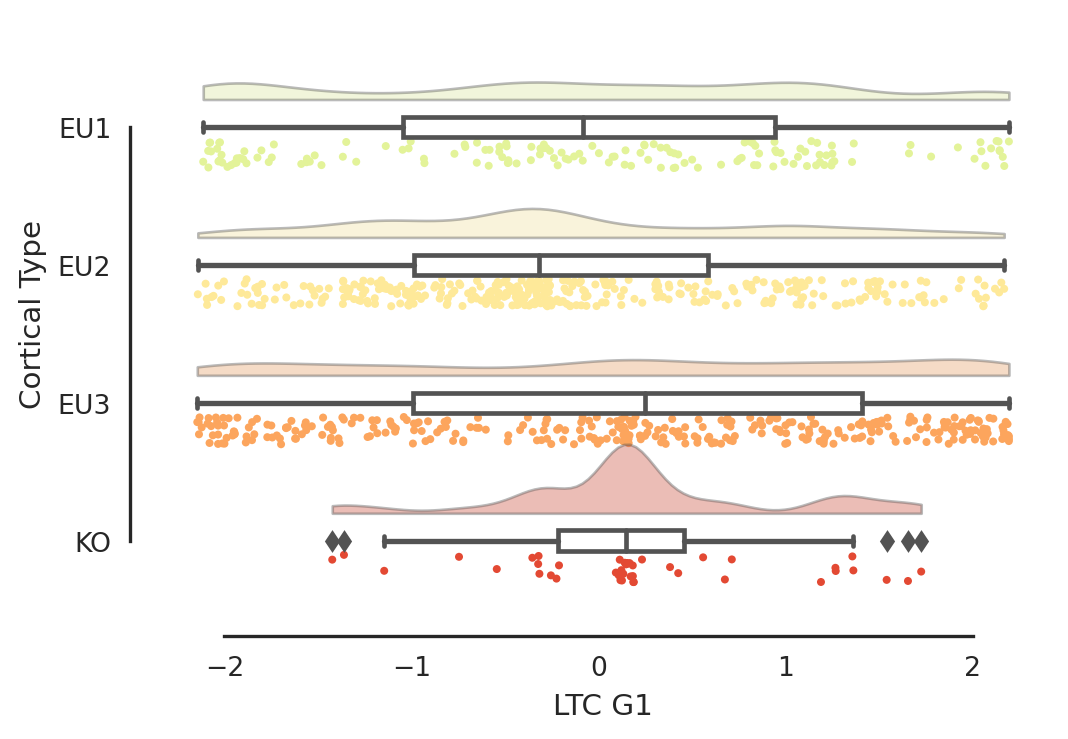

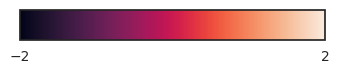

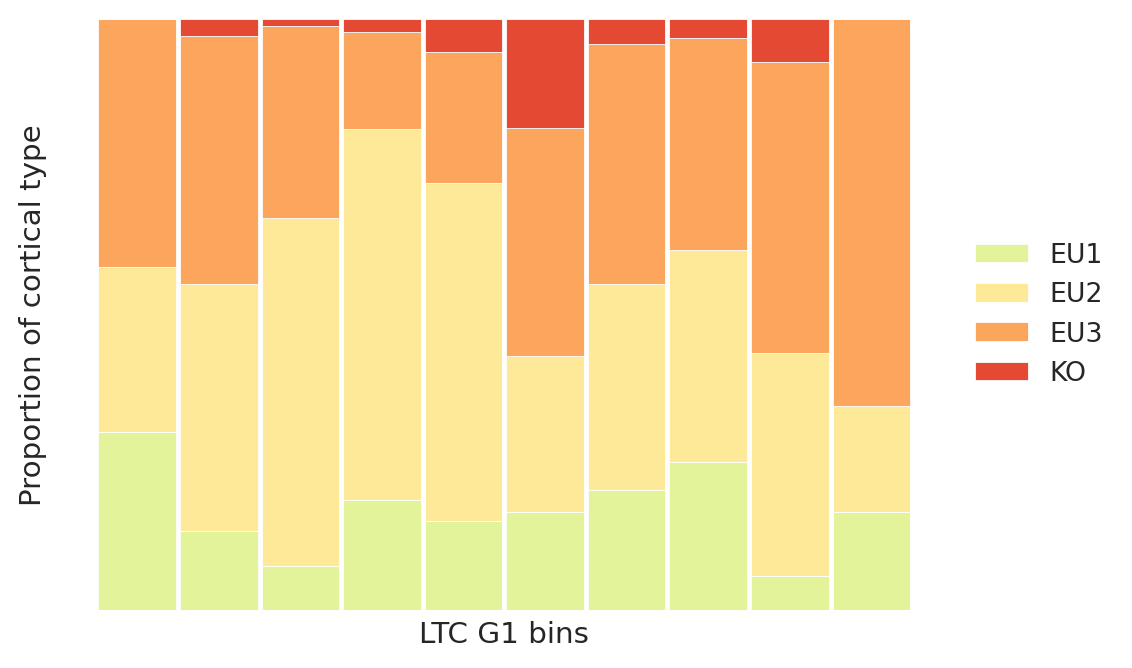

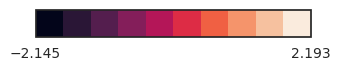

In [6]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)
ctypes.compare(ltcg, ['LTC G1'], nbins=10)